# DATA 604 FINAL PROJECT

## 1.  State the problem and its significance.

A business may want to know how long it takes to service its customers. Therefore that would be a business problem a company would want to look into and come up with the best solution possible. The reason a company may want to know that may be to serve as many customers as possible while it is open and operating each day. It may also want to know how long it takes it order to be as efficient as possible and not have customers wait to long to be serviced. The company wants the customer to have the very best customer experience as possible and hopefully have the customer repeat and come often. One such example of this would be a movie theatre company. A movie theatre company wants each movie goer to be able to buy a ticket and see the movie without much hassle or trouble. Therefore it would be in there best interest to be able to staff their theatre with enough people where wait time can be managed more effectively and efficiently. This is of great significance as it potentially can affect their bottom line upward and also downward. For the purposes of this project, a frequently used topic of queuing will be the basis of the simulation model. The code for the simulation has been taken from a web resource which will be referenced at the end.

## 2.  Provide a flow-chart model. 

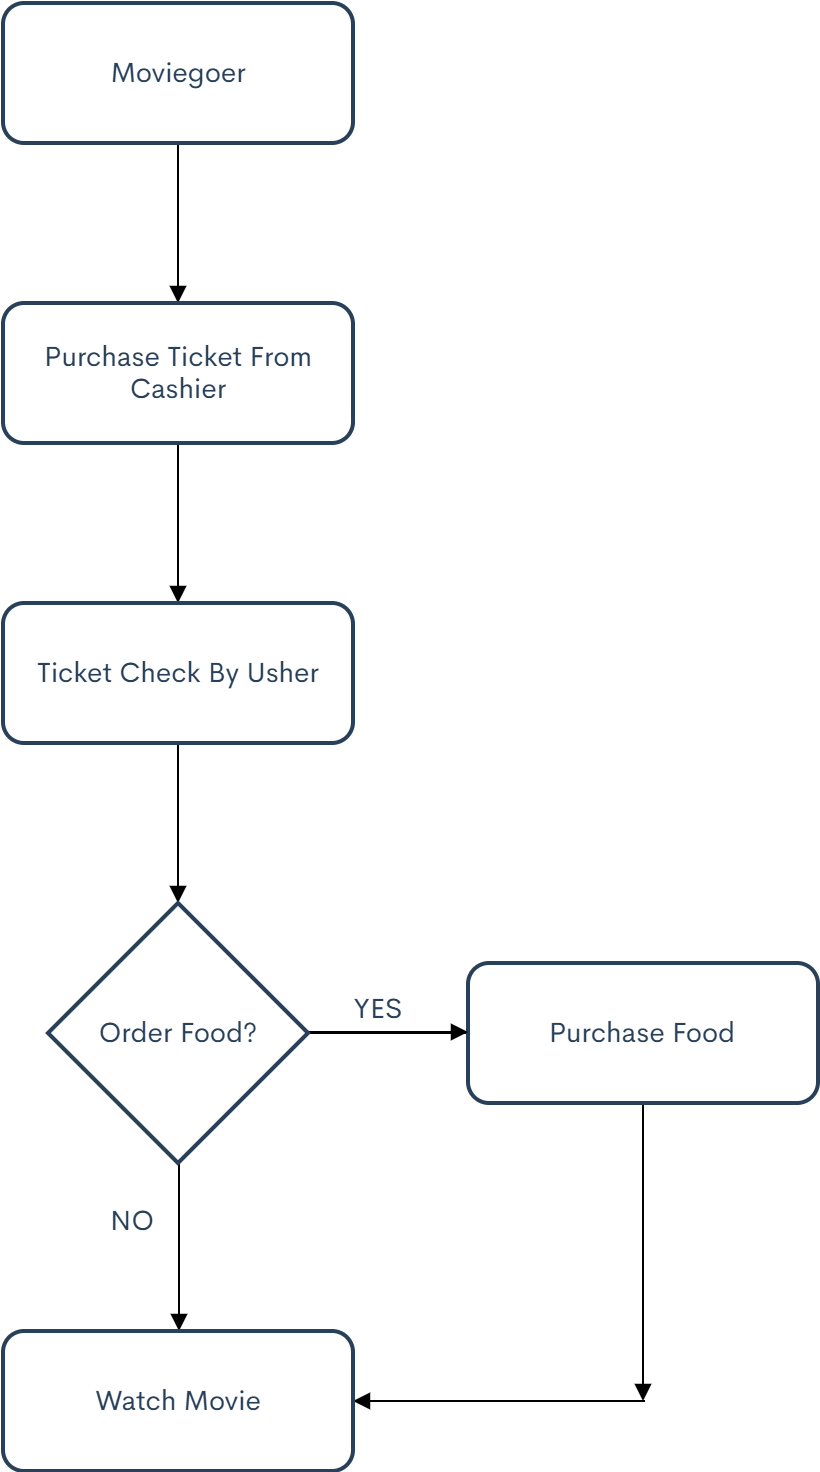

In [2]:
from IPython.display import Image 

Image("C:/Users/jkks9/Downloads/flowchart.png")

## 3.  Simulate the process for the appropriate number of iterations (justify)

The fictional movie manager requested that the average wait time come out to just under 15 minutes and the maximum number of staff who are all cross trained would be 15 for any given day. The last constraints given would be on the number of POS systems to process the sales. And the max number for movie purchases was 8 along with max number of 6 for concession stand.  Based on those criteria, this simulation was run manually for a total of of 4 times each with different inputs. On the 4th run, the average wait time came under 15 minutes. The input parameters will be shared in the conclusion. 

In [3]:
!pip install simpy

In [4]:
import simpy
import random
import statistics

In [5]:
wait_times = []

In [6]:
class Theater(object):
    def __init__(self, env, num_cashiers, num_servers, num_ushers):
        self.env = env
        self.cashier = simpy.Resource(env, num_cashiers)
        self.server = simpy.Resource(env, num_servers)
        self.usher = simpy.Resource(env, num_ushers)

    def purchase_ticket(self, moviegoer):
        yield self.env.timeout(random.randint(1, 3))

    def check_ticket(self, moviegoer):
        yield self.env.timeout(3 / 60)

    def sell_food(self, moviegoer):
        yield self.env.timeout(random.randint(1, 5))

In [7]:
def go_to_movies(env, moviegoer, theater):

    arrival_time = env.now

    with theater.cashier.request() as request:
        yield request
        yield env.process(theater.purchase_ticket(moviegoer))

    with theater.usher.request() as request:
        yield request
        yield env.process(theater.check_ticket(moviegoer))

    if random.choice([True, False]):
        with theater.server.request() as request:
            yield request
            yield env.process(theater.sell_food(moviegoer))

    wait_times.append(env.now - arrival_time)

In [8]:
def run_theater(env, num_cashiers, num_servers, num_ushers):
    theater = Theater(env, num_cashiers, num_servers, num_ushers)

    for moviegoer in range(3):
        env.process(go_to_movies(env, moviegoer, theater))

    while True:
        yield env.timeout(0.20)  

        moviegoer += 1
        env.process(go_to_movies(env, moviegoer, theater))

In [9]:

def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)

In [10]:
def get_user_input():
    num_cashiers = input("Input # of cashiers working: ")
    num_servers = input("Input # of servers working: ")
    num_ushers = input("Input # of ushers working: ")
    params = [num_cashiers, num_servers, num_ushers]
    if all(str(i).isdigit() for i in params): 
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. Simulation will use default values:",
            "\n1 cashier, 1 server, 1 usher.",
        )
        params = [1, 1, 1]
    return params

In [11]:
def main():

    random.seed(42)
    num_cashiers, num_servers, num_ushers = get_user_input()

    env = simpy.Environment()
    env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
    env.run(until=90)
    
    mins, secs = get_average_wait_time(wait_times)
    print(
        "Running simulation...",
        f"\nThe average wait time is {mins} minutes and {secs} seconds.",
    )


if __name__ == "__main__":
    main()

Input # of cashiers working: 8
Input # of servers working: 3
Input # of ushers working: 4
Running simulation... 
The average wait time is 14 minutes and 26 seconds.


## 4.  Justify the validity of the model and discuss how you verified it.

Validation checks the accuracy of the model's representation of the real system. The approach used for the purposes of this project will be based on subjective review and not objective statistical testing. Based on the knowledge of a movie theatre manager and his input. The model appears to be valid and a very close representation of the movie theatre that the company is operating. Those processes would be a typical customer arriving at a theatre and getting in line to purchase tickets, having the tickets checked by an usher, deciding to buy food at a concession stand, and then finally getting to their seats to watch the movie. Along with those processes, the manager provided data points on what the average times were for the sales transaction processing for the ticket purchased as well as the food purchases by sending over the historical data in their POS systems. 

# 5.  State  your conclusions/ findings from the model. 

The final run of the simulation which produced an average wait time under 15 minutes as requested by the movie manager had 8 cashiers, 3 servers and 4 ushers working simultaneously. In the previous outputs of average wait time which had much greater average wait times. The number of cashiers working were lower. And the lower it was, the average wait times would increase and thus based on the managers objective would be considered worse. So based on these outputs of average wait times when inputting various numbers of cashiers, servers and ushers. It appears what we may possibly conclude and may state as reasonable findings is that the number of cashiers has the biggest impact on the wait time. The more cashiers that are working the more positive results will occur as in getting lower wait times. Whereas having less cashiers no matter the number of servers or ushers are working, the worse it will be as in having higher wait times.   

# 6.  Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  Post this to the discussion. 


Graphs were generated in R using ggplot from the simulation results of the average wait times based on various inputs for the number of cashiers, ushers and servers.

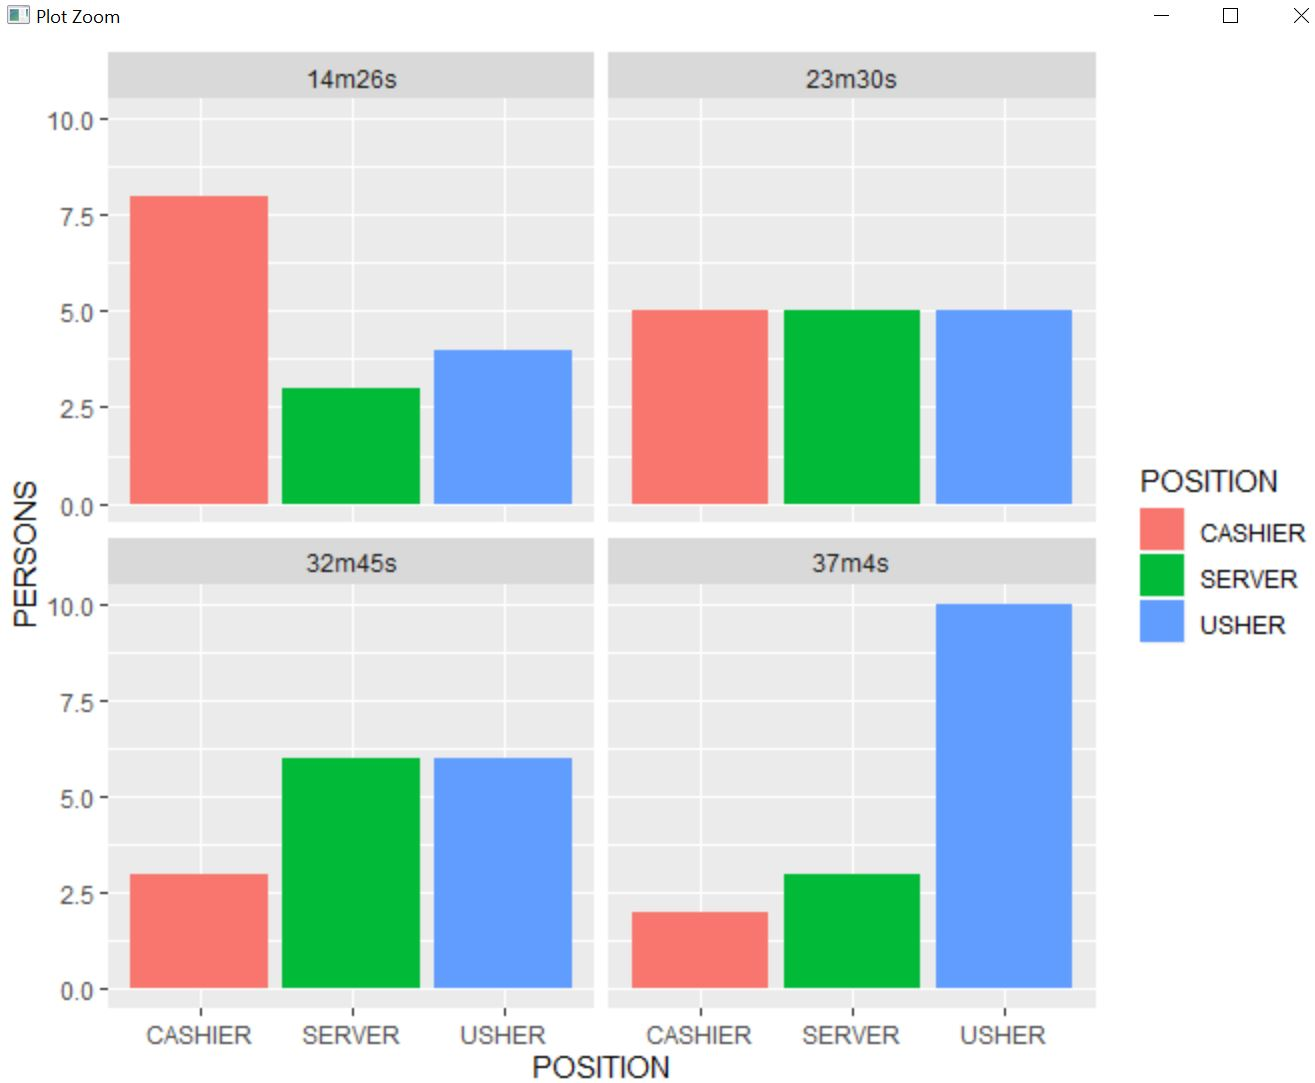

In [14]:
from IPython.display import Image 
Image("C:/Users/jkks9/graph.jpg")

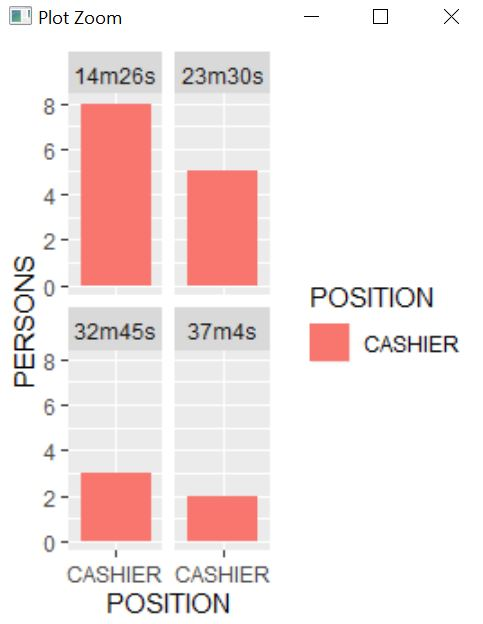

In [15]:
from IPython.display import Image 
Image("C:/Users/jkks9/graph2.jpg")

# SOURCE CODE REFERENCE:
https://github.com/realpython/materials/blob/master/simulation-with-simpy/simulate.py